# ATP Tennis Data - Raw Player Data (1985 to 2018)


In our previous notebooks, we established a baseline with encoded categories for data between 1998 to 2018. In this notebook, we will use the same data but with data starting from 1985 to see if more data helps with our model.

Our hypothesis is that model will perform worse as in our EDA notebook, we saw that the trend for upsets has changed over the past couple decades.


### Results from previous notebook

```
Model Score: 0.6833220796758946

ROC/AUC Score: 0.6833051847604916
              precision    recall  f1-score   support

        Loss       0.68      0.68      0.68      7381
         Win       0.68      0.69      0.69      7429

    accuracy                           0.68     14810
   macro avg       0.68      0.68      0.68     14810
weighted avg       0.68      0.68      0.68     14810
```

# Summary of Results

Adding data from 1985 to 1998 did not help our models perform better. Most models droped slightly in their accuracy. This matches what we saw when doing exploratory analysis.

```
Model Score: 0.6678010890454836

ROC/AUC Score: 0.6678015698312835
              precision    recall  f1-score   support

        Loss       0.67      0.67      0.67     12522
         Win       0.67      0.67      0.67     12454

    accuracy                           0.67     24976
   macro avg       0.67      0.67      0.67     24976
weighted avg       0.67      0.67      0.67     24976
```




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from datetime import datetime
import pickle
import json
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from util import jupyter_util as ju
from util.model_util import ModelWrapper, RSTATE, N_JOBS, MAX_ITER, LABEL_COL

%matplotlib inline
sns.set()


# date
DATE_FORMAT = '%Y-%m-%d'
DATE = datetime.now().strftime(DATE_FORMAT)

DESCRIPTION = "ohe-1985"

# sometimes I run these notebooks via command line. Environment variable is set so we know whether we are in DEBUG mode or not
# if you want to manually run this in DEBUG mode, change default value to True
DEBUG = bool(os.environ.get("IPYNB_DEBUG", False))

if DEBUG:
    FEATURE_FILE = f'../datasets/atp_matches_1985-2019_features_test-ohe.csv'
    ModelWrapper.REPORT_FILE = '../reports/summary-test.csv'
    DESCRIPTION = f"{DESCRIPTION}-test"
    raise Exception("Don't Run This!")
else:
    FEATURE_FILE = f'../datasets/atp_matches_1985-2019_features-ohe.csv'




START_YEAR = 1985
END_YEAR = 2018




In [2]:
X_train, X_test, y_train, y_test = ju.get_data(FEATURE_FILE, LABEL_COL, START_YEAR, END_YEAR)

# Logistic Regression

In [3]:

# train our model

lr = ModelWrapper(LogisticRegression(n_jobs = N_JOBS, verbose = 1, random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_lr = lr.predict()

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

Model Score: 0.6590727098014093

ROC/AUC Score: 0.6590844629270696
              precision    recall  f1-score   support

        Loss       0.66      0.65      0.66     12522
         Win       0.66      0.66      0.66     12454

    accuracy                           0.66     24976
   macro avg       0.66      0.66      0.66     24976
weighted avg       0.66      0.66      0.66     24976

      Loss   Win
Loss  8199  4323
Win   4192  8262


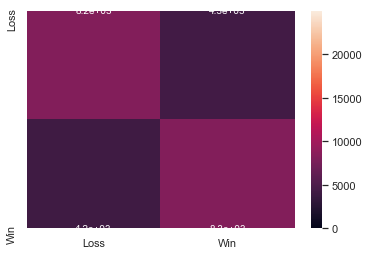

In [4]:
lr.analyze()

In [5]:
# ju.plot_2d(X_test, y_predict_lr)

In [6]:
lr.save()

Saving report: ../reports/summary.csv


/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


# KNN

In [7]:

# train our model

knn = ModelWrapper(KNeighborsClassifier(n_jobs = N_JOBS),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_knn = knn.predict()

TypeError: fit() takes 3 positional arguments but 4 were given

In [8]:
knn.analyze()

NameError: name 'knn' is not defined

In [9]:
# ju.plot_2d(X_test, y_predict_knn)

In [10]:
knn.save()

NameError: name 'knn' is not defined

# Decision Tree

In [11]:

# train our model

dt = ModelWrapper(DecisionTreeClassifier(random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_dt = dt.predict()

Model Score: 0.5944506726457399

ROC/AUC Score: 0.5944540980285169
              precision    recall  f1-score   support

        Loss       0.60      0.59      0.59     12522
         Win       0.59      0.60      0.59     12454

    accuracy                           0.59     24976
   macro avg       0.59      0.59      0.59     24976
weighted avg       0.59      0.59      0.59     24976

      Loss   Win
Loss  7428  5094
Win   5035  7419


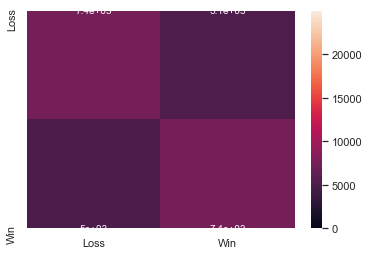

In [12]:
dt.analyze()

In [13]:
# ju.plot_2d(X_test, y_predict_dt)

In [14]:
dt.save()

Saving report: ../reports/summary.csv


/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


# Random Forest Classifier

In [15]:

# train our model

rf = ModelWrapper(RandomForestClassifier(random_state=RSTATE, verbose=1),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_rf = rf.predict()

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   18.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


Model Score: 0.634168802049968

ROC/AUC Score: 0.6339776119611626
              precision    recall  f1-score   support

        Loss       0.62      0.70      0.66     12522
         Win       0.65      0.56      0.61     12454

    accuracy                           0.63     24976
   macro avg       0.64      0.63      0.63     24976
weighted avg       0.64      0.63      0.63     24976

      Loss   Win
Loss  8818  3704
Win   5433  7021


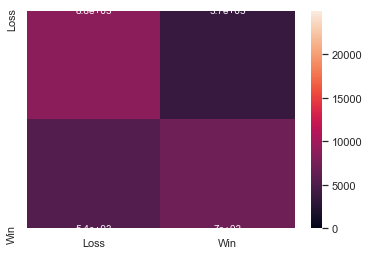

In [16]:
rf.analyze()

In [17]:
# ju.plot_2d(X_test, y_predict_rf)

In [18]:
rf.save()

Saving report: ../reports/summary.csv


/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


# Gradient Boosting

In [19]:

# train our model

gb = ModelWrapper(GradientBoostingClassifier(random_state=RSTATE, verbose=1, n_iter_no_change = 4),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_gb = gb.predict()

      Iter       Train Loss   Remaining Time 
         1           1.3669           26.00m
         2           1.3509           30.19m
         3           1.3368           29.93m
         4           1.3251           27.57m
         5           1.3144           26.26m
         6           1.3054           26.05m
         7           1.2982           26.02m
         8           1.2911           25.12m
         9           1.2850           24.77m
        10           1.2797           24.49m
        20           1.2495           21.21m
        30           1.2322           18.00m
        40           1.2218           15.45m
        50           1.2110           12.79m
        60           1.2038           10.00m
        70           1.2000            7.40m


Model Score: 0.6678010890454836

ROC/AUC Score: 0.6678015698312835
              precision    recall  f1-score   support

        Loss       0.67      0.67      0.67     12522
         Win       0.67      0.67      0.67     12454

    accuracy                           0.67     24976
   macro avg       0.67      0.67      0.67     24976
weighted avg       0.67      0.67      0.67     24976

      Loss   Win
Loss  8360  4162
Win   4135  8319


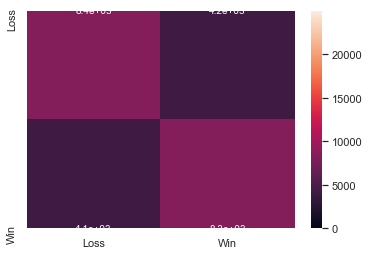

In [20]:
gb.analyze()

In [21]:
# ju.plot_2d(X_test, y_predict_gb)

In [22]:
gb.save()

Saving report: ../reports/summary.csv


/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


# AdaBoost

In [23]:
ab = ModelWrapper(AdaBoostClassifier(random_state=RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_ab = ab.predict()

Model Score: 0.6567504804612428

ROC/AUC Score: 0.656791867094386
              precision    recall  f1-score   support

        Loss       0.66      0.64      0.65     12522
         Win       0.65      0.67      0.66     12454

    accuracy                           0.66     24976
   macro avg       0.66      0.66      0.66     24976
weighted avg       0.66      0.66      0.66     24976

      Loss   Win
Loss  8034  4488
Win   4085  8369


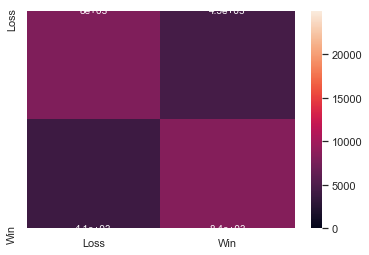

In [24]:
ab.analyze()

In [25]:
# ju.plot_2d(X_test, y_predict_ab)

In [26]:
ab.save()

Saving report: ../reports/summary.csv


/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


# Results

In [27]:
report = pd.read_csv(ModelWrapper.REPORT_FILE)
report.tail(6)

,accuracy,classification_report,confusion_matrix,data_file,data_filter_file,description,end_year,fit_time_min,model_file,model_name,predict_time_min,roc_auc_score,start_year,total_time_min
160,0.644126,"{""Loss"": {""precision"": 0.6270360242539531, ""re...","{""0"": {""0"": 10548, ""1"": 6274}, ""1"": {""0"": 4267...",../datasets/atp_matches_1985-2019_featuressym.csv,NaN,raw-sym,2018,0.0,../models/randomforestclassifier-1998-2018-raw...,RandomForestClassifier,0.0,0.644103,1998,0.0
161,0.644126,"{""Loss"": {""precision"": 0.6270360242539531, ""re...","{""0"": {""0"": 10548, ""1"": 6274}, ""1"": {""0"": 4267...",../datasets/atp_matches_1985-2019_featuressym.csv,NaN,raw-sym,2018,0.0,../models/randomforestclassifier-1998-2018-raw...,RandomForestClassifier,0.0,0.644103,1998,0.0
162,0.644126,"{""Loss"": {""precision"": 0.6270360242539531, ""re...","{""0"": {""0"": 10548, ""1"": 6274}, ""1"": {""0"": 4267...",../datasets/atp_matches_1985-2019_featuressym.csv,NaN,raw-sym,2018,0.0,../models/randomforestclassifier-1998-2018-raw...,RandomForestClassifier,0.0,0.644103,1998,0.0
163,0.667801,"{""Loss"": {""precision"": 0.6690676270508203, ""re...","{""0"": {""0"": 8360, ""1"": 4135}, ""1"": {""0"": 4162,...",../datasets/atp_matches_1985-2019_features-ohe...,NaN,ohe-1985,2018,19.0,../models/gradientboostingclassifier-1985-2018...,GradientBoostingClassifier,0.0,0.667802,1985,19.0
164,0.653107,"{""Loss"": {""precision"": 0.655064308681672, ""rec...","{""0"": {""0"": 8149, ""1"": 4291}, ""1"": {""0"": 4373,...",../datasets/atp_matches_1985-2019_features-raw...,../models/gradientboostingclassifier-1985-2018...,ohe-stats-baseline,2018,0.0,../models/gradientboostingclassifier-1985-2018...,GradientBoostingClassifier,0.0,0.653113,1985,0.0
165,0.656750,"{""Loss"": {""precision"": 0.6629259839920786, ""re...","{""0"": {""0"": 8034, ""1"": 4085}, ""1"": {""0"": 4488,...",../datasets/atp_matches_1985-2019_features-ohe...,NaN,ohe-1985,2018,2.0,../models/adaboostclassifier-1985-2018-ohe-198...,AdaBoostClassifier,0.0,0.656792,1985,2.0


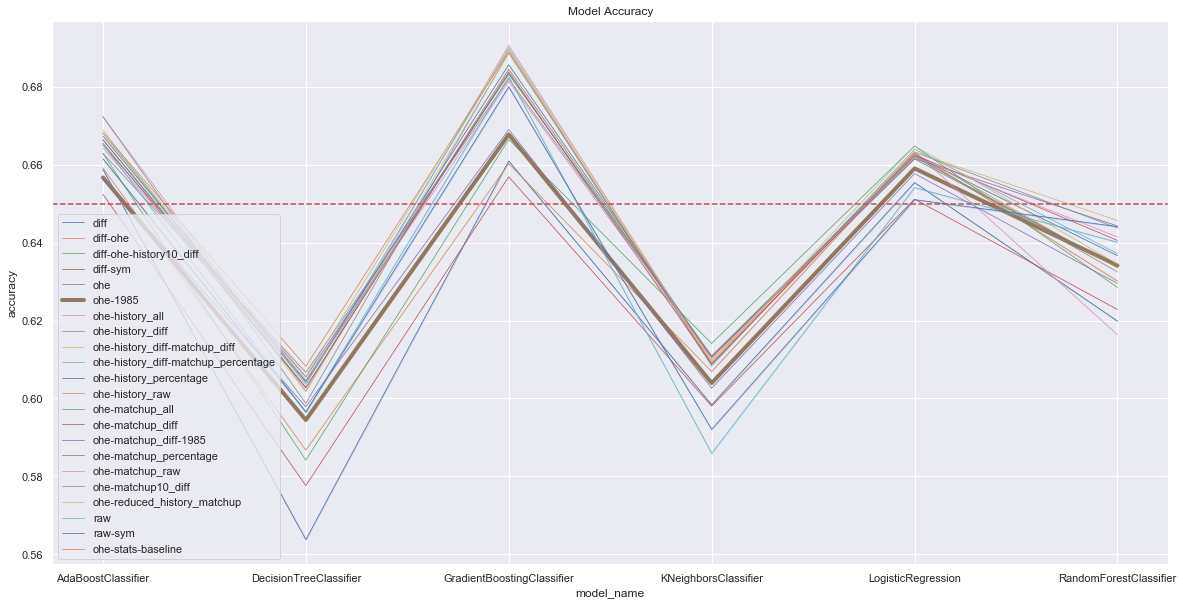

In [28]:
f, a = plt.subplots(1, 1, figsize=(20, 10))

descs = report.description.unique()

for desc in descs:
    report_desc = report[report.description == desc]
    if desc == DESCRIPTION:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=4)
    else:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=0.75)

a.axhline(0.65, ls='--', color='r')
a.set_title(f"Model Accuracy")
_ = a.legend(loc="lower left")

Best Model: GradientBoostingClassifier


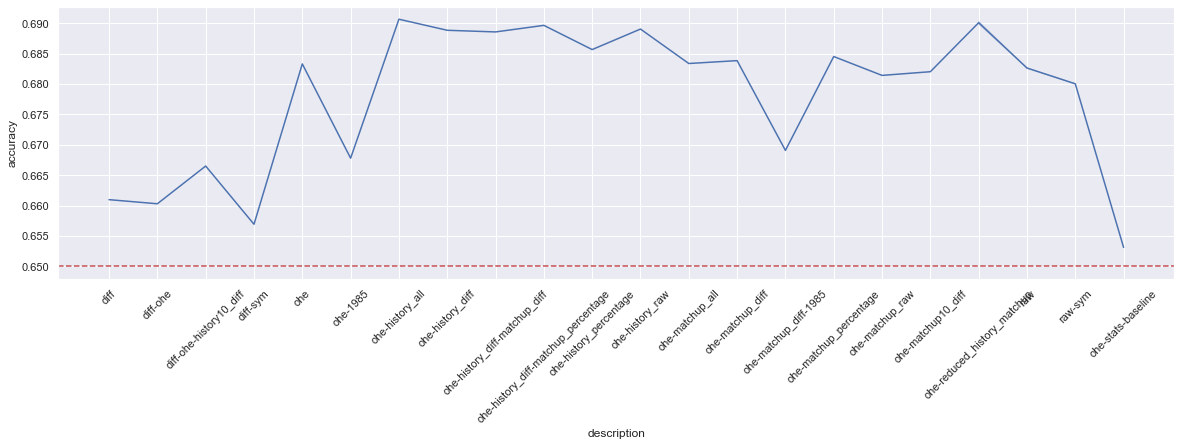

In [29]:
best_model = report.loc[report[report.description == DESCRIPTION].accuracy.idxmax()].model_name
print(f'Best Model: {best_model}')

dt_report = report[(report.model_name == best_model)]

f, a = plt.subplots(1, 1, figsize=(20, 5))
_ = sns.lineplot(x="description", y="accuracy", data=dt_report, ax=a, sort=False)
_ = a.axhline(0.65, ls='--', color='r')
_ = a.set_label(f"{best_model} Accuracy")
_ = plt.xticks(rotation=45)


In [30]:
current_report = report[(report.model_name == 'GradientBoostingClassifier') &
                                  (report.description == DESCRIPTION)]
mw = ModelWrapper.get_model_wrapper_from_report(current_report)


AssertionError: data must of length 1 - got 3

In [31]:
import shap

shap.initjs()

explainer = shap.TreeExplainer(mw.model, data=X_train.values)
shap_values = explainer.shap_values(X_test.values)

NameError: name 'mw' is not defined

In [32]:
shap.summary_plot(shap_values, X_test, max_display=30)

NameError: name 'shap_values' is not defined

In [33]:
shap.summary_plot(shap_values, feature_names=X_test.columns, title="Feature Importance")

NameError: name 'shap_values' is not defined

In [34]:
print(f'Last Finished: {datetime.now().strftime("%Y-%m-%d %H:%M")}')

Last Finished: 2019-10-26 10:09
